# Libraries

Import libararies to implement the described machine learning methods using a few different `sklearn` algorithms.

In [306]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score
from sklearn.metrics import recall_score, f1_score, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap


## Load Data


In [307]:
data = load_breast_cancer()
data.target[[10, 50, 85]]
list(data.target_names)

['malignant', 'benign']

In [308]:
list(data.feature_names)


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

<p><b>Assign the features and target values</b></p>

In [309]:
X=data.data
y= data.target

<p><b>Train test and split the data</b></p>

In [310]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  train_size=0.8, 
                                                  random_state=0)

## Preprocessing:



<p><b>Run StandardScalar to standardise the scalar data</b></p>

In [311]:
# Assuming X_train is defined and contains some data

# Create an instance of StandardScaler
sc_x = StandardScaler()

# Standardize the features
X_std_train = sc_x.fit_transform(X_train)
X_std_test = sc_x.fit_transform(X_test)

<h2>Linear SVM</h2>

In [312]:


clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_std_train, y_train)

SVC(kernel='linear')

<h3>Cross validation within Train Dataset</h3>

In [313]:
res = cross_val_score(clf_linear, X_std_train, y_train, cv=10, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}'.format(np.mean(res)))
print('Accuracy:\t\t{0:.4f}'.format(np.std(res)))

Average Accuracy:	0.9715
Accuracy:		0.0198


In [314]:
y_train_pred = cross_val_predict(clf_linear, X_std_train, y_train,cv=3)

<h3>Confusion Matrix of train dataset</h3>

In [315]:
confusion_matrix(y_train,y_train_pred)

array([[158,   7],
       [  5, 285]])

<p><b>Almost 7+5=12 errorneous predictions</b></p>

<h3>Cross validation within test Dataset</h3>

In [316]:
res = cross_val_score(clf_linear, X_std_test, y_test, cv=10, scoring='accuracy')
print('Average Accuracy: \t{0:.4f}'.format(np.mean(res)))
print('Accuracy: \t\t{0:.4f}'.format(np.std(res)))

Average Accuracy: 	0.9227
Accuracy: 		0.0949


In [317]:
y_test_pred = cross_val_predict(clf_linear, X_std_test, y_test,cv=3)

<h3>Confusion Matrix of test dataset</h3>

In [318]:
confusion_matrix(y_test,y_test_pred)

array([[42,  5],
       [ 2, 65]])

<p><b>Almost 5+2=7 errorneous predictions in test dataset</b></p>

<h4>Linear classification has a good accuracy of around 97% in training set and 92% in test set with considerably less misclassifications</h4>

## Soft margin 

In [319]:
C=0.01
clf_svm = svm.SVC(kernel='linear', C=C)
clf_svm.fit(X_std_train, y_train)

SVC(C=0.01, kernel='linear')

<h3>Cross validation within Train Dataset</h3>

In [320]:
res = cross_val_score(clf_svm, X_std_train, y_train, cv=10, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}'.format(np.mean(res)))
print('Accuracy:\t\t{0:.4f}'.format(np.std(res)))

Average Accuracy:	0.9670
Accuracy:		0.0179


In [321]:
y_train_pred = cross_val_predict(clf_svm, X_std_train, y_train,cv=3)

<h3>Confusion Matrix of train dataset</h3>

In [322]:
confusion_matrix(y_train,y_train_pred)

array([[149,  16],
       [  2, 288]])

<p><b>Almost 16+2=18 errorneous predictions in train dataset</b></p>

<h3>Cross validation within test Dataset</h3>


In [323]:
res = cross_val_score(clf, X_std_test, y_test, cv=10, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}'.format(np.mean(res)))
print('Accuracy:\t\t{0:.4f}'.format(np.std(res)))

Average Accuracy:	0.8970
Accuracy:		0.0981


In [324]:
y_test_pred = cross_val_predict(clf_svm, X_std_test, y_test,cv=3)

<h3>Confusion Matrix of test dataset</h3>

In [325]:
confusion_matrix(y_test,y_test_pred)

array([[42,  5],
       [ 0, 67]])

<p><b>Almost 5 errorneous predictions in test dataset</b></p>

<h4>Soft margin also  has a good accuracy of around 97% in training set and 91% in test set with very less misclassifications</h4>

<h2>Non Linear SVM - rbf kernel</h2>

In [326]:
svr_nonLinear = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_nonLinear.fit(X_train,y_train)

SVR(C=1000.0, gamma=0.1)

In [327]:
y_train_pred = svr_nonLinear.predict(X_train)

In [328]:
y_test_pred = svr_nonLinear.predict(X_test)

In [329]:
print("MSE train: {0:,.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:,.4f}, test: {1:.4f}".\
     format(r2_score(y_train,y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.0100, test: 0.2420
R^2 train: 0.9567, test: 0.0013


<h2>Hyper parameter Tuning</h2>

In [330]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

rnd_search_cv = RandomizedSearchCV(clf, 
                                   param_distributions,
                                   n_iter=10, 
                                   verbose=2, 
                                   cv=3)
rnd_search_cv.fit(X_std_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=3.040024289117026, gamma=0.0011880548612171198; total time=   0.0s
[CV] END ...C=3.040024289117026, gamma=0.0011880548612171198; total time=   0.0s
[CV] END ...C=3.040024289117026, gamma=0.0011880548612171198; total time=   0.0s
[CV] END .....C=3.7921121399283, gamma=0.0012676144173751594; total time=   0.0s
[CV] END .....C=3.7921121399283, gamma=0.0012676144173751594; total time=   0.0s
[CV] END .....C=3.7921121399283, gamma=0.0012676144173751594; total time=   0.0s
[CV] END ...C=7.998233808713355, gamma=0.0043522514748137375; total time=   0.0s
[CV] END ...C=7.998233808713355, gamma=0.0043522514748137375; total time=   0.0s
[CV] END ...C=7.998233808713355, gamma=0.0043522514748137375; total time=   0.0s
[CV] END ...C=10.702560233285919, gamma=0.007671039563493936; total time=   0.0s
[CV] END ...C=10.702560233285919, gamma=0.007671039563493936; total time=   0.0s
[CV] END ...C=10.702560233285919, gamma=0.007671

RandomizedSearchCV(cv=3, estimator=SVC(gamma=2, kernel='sigmoid'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x11977add0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x119b88450>},
                   verbose=2)

In [331]:
rnd_search_cv.best_estimator_

SVC(C=10.702560233285919, gamma=0.007671039563493936, kernel='sigmoid')

In [332]:
rnd_search_cv.best_score_

0.9714767050075519

In [333]:
rnd_search_cv.best_estimator_.fit(X_std_train, y_train)

SVC(C=10.702560233285919, gamma=0.007671039563493936, kernel='sigmoid')

In [334]:
y_pred = rnd_search_cv.best_estimator_.predict(X_std_train)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.1690308509457033

In [335]:
y_pred = rnd_search_cv.best_estimator_.predict(X_std_test)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.22941573387056177

In [336]:
y_pred = rnd_search_cv.best_estimator_.predict(X_std_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

<h4>Applying the gamma and C values for the non linear classifications, we got the best accuracy score of 98%</h4>

<h2>Visualize decision boundaries for linear and non-linear SVMs.</h2>

In [337]:
# Plot decision boundaries
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

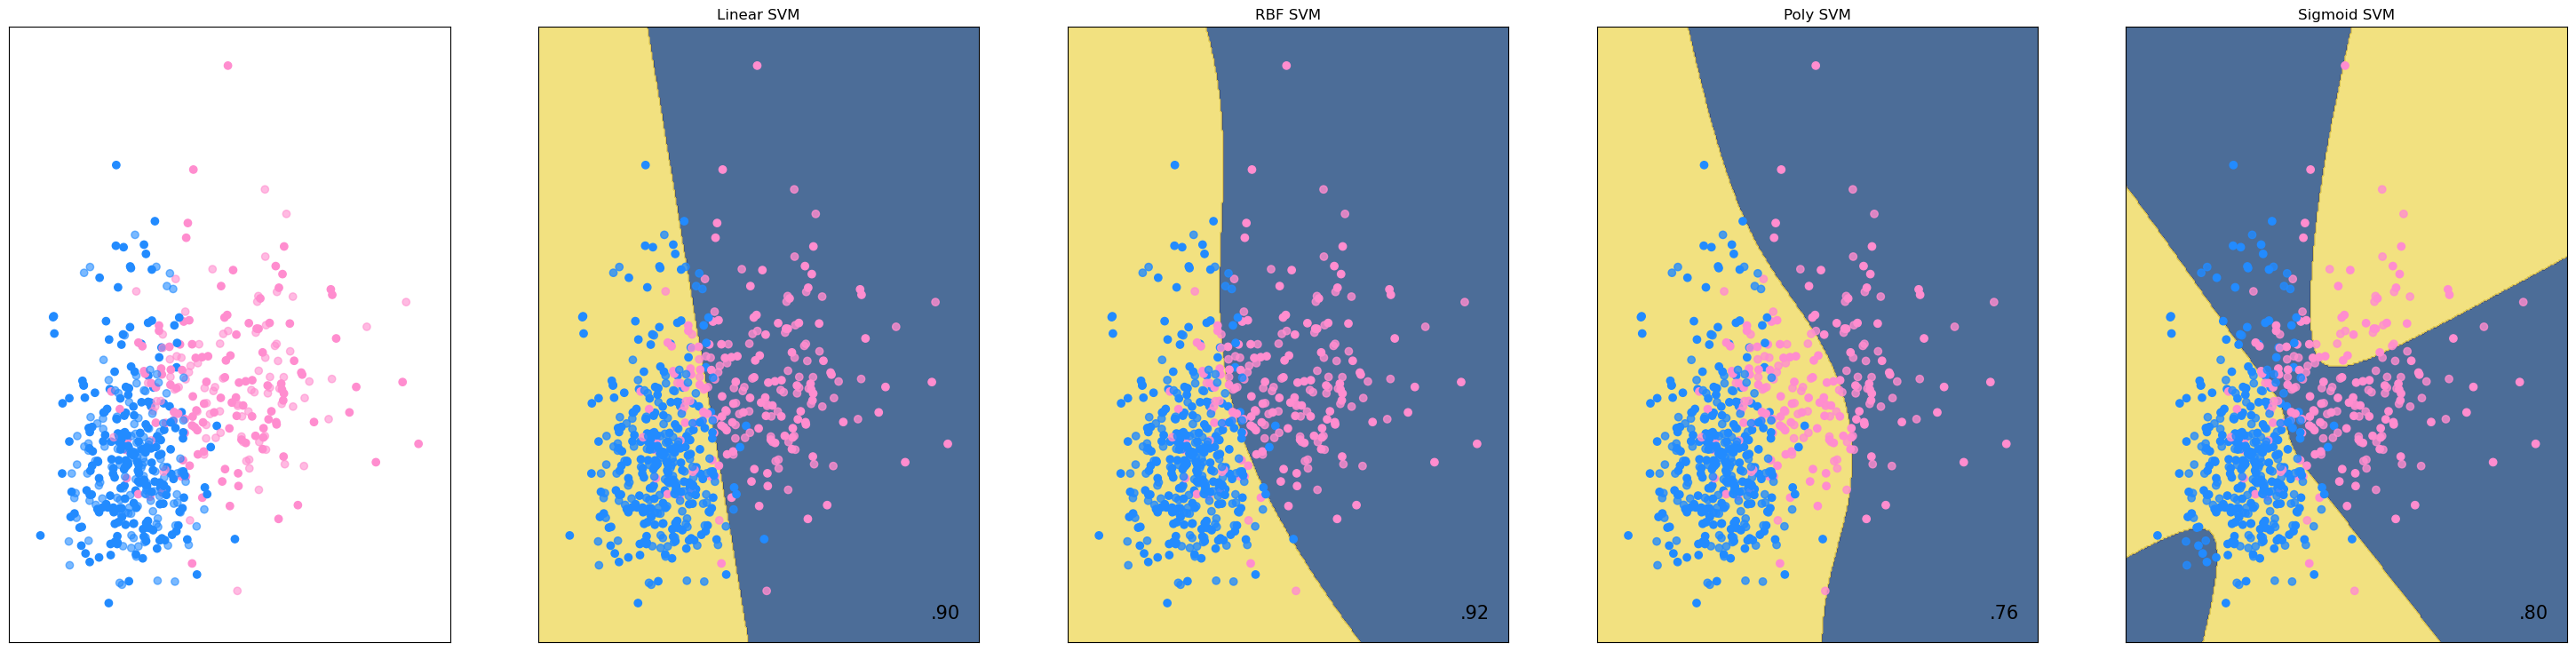

In [359]:
h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM"]
classifiers = [
    SVC(kernel="linear", C=2.0),
    SVC(gamma=0.1, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)
    ]

data = [load_breast_cancer()]

figure = plt.figure(figsize=(30, 9))
i = 1
# iterate over datasets
for ds in data:
    # preprocess dataset, split into training and test part
    X, y = ds.data[:,:2],ds.target
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.cividis
    cm_bright = ListedColormap(['#FF8DCF', '#345B8C','#228BFF'])
    ax = plt.subplot(len(data), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(data), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.7)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.8)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
       
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)

plt.show();

<ul>
    <li>The first box is a scatter plot</li>
<li> The second box is linear SVM which shows definite decision boundary created. </li>
<li>The subsequent boxes denotes the non-linear SVMs. There is a good amount of misclassification in non-linear SVMs</li>
<li> The gamma value is given as 0.1. However increasing the gamma value could give a better results in case non-Linear SVMs also.</li></ul>